# NumPy Introduction

## N-dimensional Arrays

In [2]:
# Two dimentional ndarray

import numpy as np
lst = [[1, 2, 3], [4, 5, 6]]
ary1d = np.array(lst)
ary1d

array([[1, 2, 3],
       [4, 5, 6]])

In [5]:
ary1d.dtype

dtype('int64')

In [7]:
float32_ary = ary1d.astype(np.float32) # changes the data type of the ndarray
float32_ary
float32_ary.dtype

dtype('float32')

In [12]:
ary2d = np.array([[1, 2, 3], [4, 5, 6]], dtype='int64')
ary2d.itemsize # gets size of each element
ary2d.size # returns the number of elements in an array
ary2d.ndim # the number of dimensions in the ndarray
ary2d.shape # returns the number of dimensions along each axes

(2, 3)

In [14]:
np.array([1, 2, 3]).shape # is a 1-dimensional ndarray

(3,)

In [19]:
scalar = np.array(5) # scalar object
scalar
scalar.ndim # 0
scalar.shape

()

## Array Construction Routines

In [26]:
# Construction from generator functions

def generator():
    for i in range(10):
        if i % 2:
            yield i
gen = generator()
np.fromiter(gen, dtype=int) # got an array from a generator

# using 'comprehensions' the following
# generator expression is equivalent to
# the \code {generator} above

generator_expression = (i for i in range(10) if i % 2)
np.fromiter(generator_expression, dtype=int)

array([1, 3, 5, 7, 9])

In [28]:
# Creating ndarrays consisting of only ones
np.ones((3, 3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [32]:
# Creating ndarrays consisting of only zeros
np.zeros((3, 3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [34]:
# Creating ndarray of nothing
np.empty((3,3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [39]:
# Creating an identity matrix -> pass the number of rows or columns
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [42]:
# Creating a diagonal matrix -> pass the diagonal values
np.diag((1,2,3))

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [45]:
# Creating ndarrays from a range
np.arange(4, 10)
np.arange(5)
np.arange(0, 10, 2)

array([0, 2, 4, 6, 8])

In [47]:
# Creating a ndarray range of evenly spaced values specified by a half-open interval
np.linspace(0, 1, num=5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

## Array Indexing

In [49]:
# Indexing and slicing one-dimensional ndarray
ary = np.array([1, 2, 3])
ary[0]
ary[:2]

array([1, 2])

In [56]:
# Indexing and slicing multi-dimensional ndarray
ary = np.array([[1, 2, 3], [4, 5, 6]])
ary[0, 0]
ary[-1, -1]
ary[0, 1]
ary[0]
ary[:, 0]
ary[:, :2]
ary[0, 0]

1

## Array Math and Universal Functions

In [59]:
# Vanilla python code to add a scalar to an ndarray

lst = [[1, 2, 3], [4, 5, 6]]
for row_idx, row_val in enumerate(lst):
    for col_idx, col_val in enumerate(row_val):
        lst[row_idx][col_idx] += 1
lst

[[2, 3, 4], [5, 6, 7]]

In [60]:
# Above same task using comprehension
lst = [[1, 2, 3], [4, 5, 6]]
[[cell + 1 for cell in row] for row in lst]

[[2, 3, 4], [5, 6, 7]]

In [66]:
# Above same task using NumPy

ary = np.array([[1, 2, 3], [4, 5, 6]])
ary = np.add(ary, 1)
ary

# Using operator overloaded functions

ary + 1 # adds 1

ary ** 2 # raises power to 2 of each element

array([[ 4,  9, 16],
       [25, 36, 49]])

In [75]:
# Computing row and column sums using reduce()

# Column sums
ary = np.array([[1, 2, 3], [4, 5, 6]])
np.add.reduce(ary)

# Row sums
np.add.reduce(ary, axis=1)

# Column sum
np.sum(ary, axis=0)
ary.sum(axis=0)

# Total sum
ary.sum()

21

In [126]:
# Some useful unary ufuncs - (universal functions)

# Mean
np.mean(ary)
ary.mean()

# Standard Deviation
np.std(ary)
ary.std()

# Variance
np.var(ary)
ary.var()

# Sort
np.sort(ary)
ary.sort() # Sorts permanently

# Return sort indices
np.argsort(ary)
ary.argsort()

# Minimum
np.min(ary)
ary.min()

# Maximum
np.max(ary)
ary.max()

# Index of Minimum
np.argmin(ary)
ary.argmin()

# Index of Maximum
np.argmax(ary)
ary.argmax()

# Check whether two arrays are equal or not (i.e. have same shape and same elements)
a = np.array([1, 2, 3])
b = np.array([1, 2, 3])
np.array_equal(a, b)

True

## Broadcasting

In [132]:
# Broadcasting will allow arrays to be in arithmetic operations inspite having different shapes

# Addition of two arrays

ary1 = np.array([1, 2, 3])
ary2 = np.array([4, 5, 6])
ary1 + ary2

ary3 = np.array([[4, 5, 6], [7, 8, 9]])
ary3 + ary1

# Number of elements along explicit axes and implicit grids must match to perform the arithmetic operations

try:
    ary3 + np.array([1, 2])
except ValueError as e:
    print('ValueError:', e)

# to perform the above task make the row size equal to ary3

ary3 + np.array([[1], [2]])
np.array([[1], [2]]) + ary3

ValueError: operands could not be broadcast together with shapes (2,3) (2,) 


array([[ 5,  6,  7],
       [ 9, 10, 11]])

## Advanced Indexing - Memory Views and Copies

In [139]:
# Array Indexing and Slicing do not create a new ndarray instead they are the copies (views) of the original array

ary = np.array([[1, 2, 3], [4, 5, 6]])
first_row = ary[0]
first_row += 99
ary # Values are changed in the actual array

ary = np.array([[1, 2, 3], [4, 5, 6]])
first_row = ary[:1]
first_row += 99
ary

ary = np.array([[1, 2, 3], [4, 5, 6]])
center_col = ary[:, 1]
center_col += 99
ary

array([[  1, 101,   3],
       [  4, 104,   6]])

In [142]:
# copy() method to create a copy of the slicing or indexing operations

ary = np.array([[1, 2, 3], [4, 5 ,6]])
second_row = ary[1].copy()
second_row += 99
second_row
ary # Values remain the same

array([[1, 2, 3],
       [4, 5, 6]])

In [146]:
# To check whether two arrays share memory or not

ary = np.array([[1, 2, 3], [4, 5, 6]])
first_row = ary[:1]
first_row += 99
ary
np.may_share_memory(first_row, ary)

second_row = ary[1].copy()
second_row += 99
ary
np.may_share_memory(second_row, ary)

False

In [152]:
# Fancy indexing
# always returns a copy

ary = np.array([[1, 2, 3], [4, 5, 6]])
ary[:, [0, 2]]

this_is_a_copy = ary[:, [0, 2]]
this_is_a_copy += 99
ary

ary[:, [2, 0]]

array([[3, 1],
       [6, 4]])

In [160]:
# Boolean mask for indexing
# always returns a copy

ary = np.array([[1, 2, 3], [4, 5, 6]])
greater3_mask = ary > 3
greater3_mask

ary[greater3_mask] # mask the values using boolean values

# Combining logical operators
ary[(ary > 3) & (ary % 2 == 0)]

array([4, 6])

## Comparison Operators and Mask

In [180]:
ary = np.array([1, 2, 3, 4])
mask = ary > 2
mask # Creates a boolean mask

ary[mask] # Assigns values for True boolean values in the mask

mask.sum() # returns the total number of True masks

mask.nonzero() # returns the indices of True masks

# to select element's index into an array based on boolean conditions

np.where(ary > 2)

np.where(ary > 2, 1, 0) # np.where(condition, x, y) similar to condition ? x : y


ary = np.array([1, 2, 3, 4])
mask = ary > 2
ary[mask] = 1 # assign values to True masks
ary[~mask] = 0 # assign values to False masks
ary

ary = np.array([1, 2, 3, 4])
(ary > 3) | (ary < 2)

~((ary > 3) | (ary < 2))

array([False,  True,  True, False])

## Random Number Generators

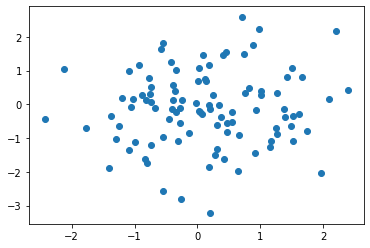

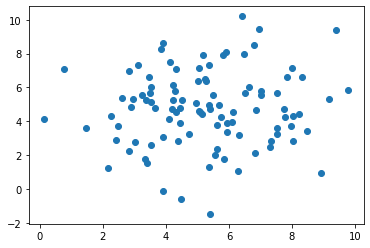

In [194]:
# Random numbers from a uniform distribution

np.random.seed(123)
np.random.rand(3)

# Using a RandomState object

rng1 = np.random.RandomState(seed=123)
rng1.rand(3)

# Random numbers form a normal distribution N(mu, sigma-squared), here N(0, 1)

rng2 = np.random.RandomState(seed=123)
z_scores = rng2.randn(100, 2)

# Visualising the z_scores values using matplotlib

import matplotlib.pyplot as plt
plt.scatter(z_scores[:, 0], z_scores[:, 1])
plt.show()

# Using a different normal distribution, here N(5, 4)

rng3 = np.random.RandomState(seed=123)
scores = 2 * rng3.randn(100, 2) + 5
plt.scatter(scores[:, 0], scores[:, 1])
plt.show()

## Reshaping Arrays

In [204]:
# Changing the dimensions
# Reshaping will produce views not copies

ary1d = np.array([1, 2, 3, 4, 5, 6])
ary2d_view = ary1d.reshape(2, 3)
ary2d_view

np.may_share_memory(ary1d, ary2d_view) # both arrays share the same memory

# a '-1' values is given to the 1d array to create a nxm matrix with n or m not known
ary1d.reshape(2, -1) # 2x3
ary1d.reshape(-1, 2) # 3x2

# reshape to flatten an array
ary1d.reshape(-1) # 1xn

ary1d.ravel() # 1xn # shorthand function # returns a view

np.may_share_memory(ary2d.flatten(), ary2d) # flatten() # returns a copy
np.may_share_memory(ary2d.ravel(), ary2d) # ravel() # returns a view

True

In [208]:
# Concatenate two arrays

ary = np.array([1, 2, 3])
np.concatenate((ary, ary)) # concatenate # pass a tuple

ary = np.array([[1, 2, 3]])
np.concatenate((ary, ary), axis=0) # stack along the row
np.concatenate((ary, ary), axis=1) # stack along the column

array([[1, 2, 3, 1, 2, 3]])

## Linear Algebra with NumPy Arrays

In [9]:
# Row vector
row_vector = np.array([1, 2, 3])
row_vector

# Column vector
col_vector = np.array([1, 2, 3]).reshape(-1, 1)
col_vector

# Column vector by adding an axis to the row_vector
row_vector[:, np.newaxis]

# Same as above
row_vector[:, None]

# Matrix Multiplication

matrix = np.array([[1, 2, 3], [4, 5, 6]])
np.matmul(matrix, col_vector)

# Due to broadcasting
np.matmul(matrix, row_vector)

array([14, 32])

In [13]:
# Dot Product of two matrices

np.matmul(row_vector, row_vector)

# Using dot() function
np.dot(row_vector, row_vector)

np.dot(matrix, row_vector)
np.dot(matrix, col_vector)

array([[14],
       [32]])

In [20]:
# Transpose of a matrix

matrix = np.array([[1, 2, 3], [4, 5, 6]])
matrix.transpose()
np.transpose(matrix)
np.array([[1, 2, 3], [4, 5, 6]]).transpose()

np.matmul(matrix, matrix.transpose())
np.dot(matrix, matrix.transpose())

# Shorthand for transpose()
matrix.T

array([[1, 4],
       [2, 5],
       [3, 6]])

## Set Operations

In [27]:
# Creating a set

ary = np.array([1, 1, 2, 3, 1, 5])
ary_set = np.unique(ary)
ary_set

# Set Operations # assume_unique=True to speed up the operation

ary1 = np.array([1, 2, 3])
ary2 = np.array([3, 4, 5, 6])
np.intersect1d(ary1, ary2, assume_unique=True)
np.setdiff1d(ary1, ary2, assume_unique=True)
np.union1d(ary1, ary2)

np.union1d(np.setdiff1d(ary1, ary2, assume_unique=True), np.setdiff1d(ary2, ary1, assume_unique=True))

array([1, 2, 4, 5, 6])

## Serializing NumPy Arrays

In [28]:
# saving a single array object

ary1 = np.array([1, 2, 3])
np.save('ary-data.npy', ary1)
np.load('ary-data.npy')

array([1, 2, 3])

In [38]:
# saving multiple array objects using np.savez

ary1 = np.array([1, 2, 3])
ary2 = np.array([4, 5, 6])
np.savez('ary-data.npz', ary1, ary2)
# Loading data
d = np.load('ary-data.npz')
# d.keys()
d.files
d['arr_0']
d['arr_1']

# using custom array names
kwargs = {'ary1': ary1, 'ary2': ary2}
np.savez('ary-data.npz', **kwargs)
np.load('ary-data.npz')
d = np.load('ary-data.npz')
d['ary1']

array([1, 2, 3])